In [11]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV

In [12]:
X,y=pd.DataFrame(load_diabetes().data,columns=load_diabetes().feature_names),pd.DataFrame(load_diabetes().target,columns=['target'])

In [13]:
X.head()
y.head()


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
params={
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter":["best", "random"],
    "max_depth":[2,4,6,8,10,12,14,16,18,20],
    "max_features":["auto", "sqrt", "log2"]
}

In [20]:
tree=DecisionTreeRegressor()
grid=GridSearchCV(tree,params,cv=5,scoring='neg_mean_squared_error')

In [21]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 4, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [22]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [23]:
y_pred=grid.predict(X_test)

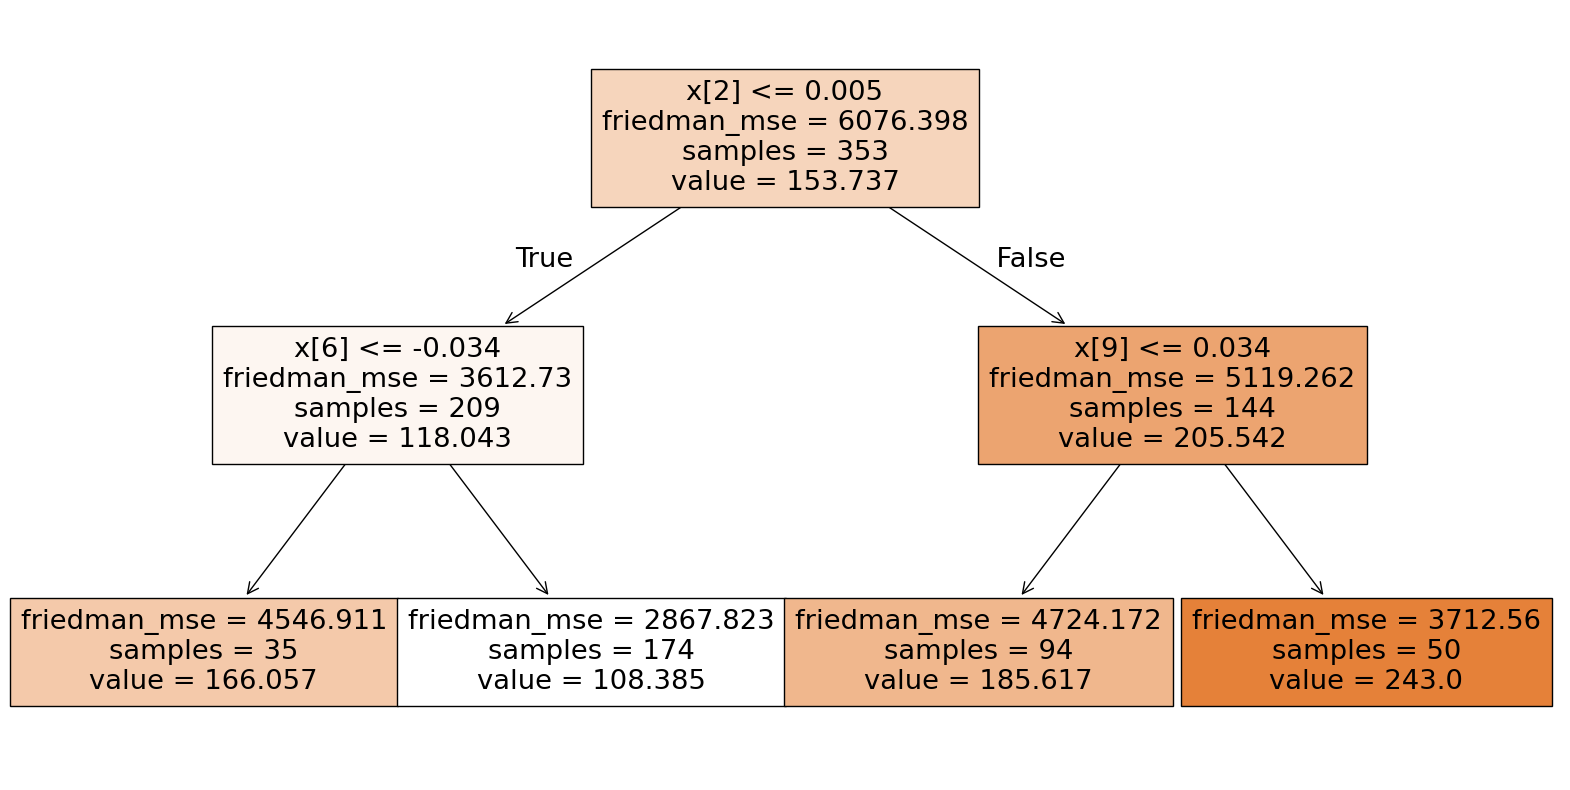

In [24]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(grid.best_estimator_,filled=True)
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
mse = mean_squared_error(y_test, y_pred)    
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"root Mean Squared Error: {np.sqrt(mse)}")
print(f"R^2 Score: {r2}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred.round())}")

Mean Squared Error: 3668.4407788987573
root Mean Squared Error: 60.56765455999396
R^2 Score: 0.30759990407487614
Accuracy Score: 0.011235955056179775


In [ ]:
hoiahdiahfaifasf;lksf;as